In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# sns.set_theme(style="darkgrid")
# sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
# # pwd
# os.chdir('..')
# all_df = pd.read_csv('/Users/cta/Documents/GitHub/Multi_Agents_Area_Exploration/data/all_data.csv')

cwd = os.getcwd()
root_directory = os.path.dirname(os.getcwd())

In [4]:
# check the data for NaN values or other errors
df_all = pd.read_csv(f"{root_directory}/../data/all_data.csv")
# # data_save/all_data_map-len30.csv
# df_all = pd.read_csv(f"{root_directory}/data_save/all_data_map-len30.csv")

# checlk if the plot folder exists
if not os.path.exists(f"{root_directory}/../data_analysis/plots"):
    print("Creating plots folder")
    os.mkdir(f"{root_directory}/../data_analysis/plots")
else:
    print("plots folder exists")

df_all.info()

plots folder exists
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11161945 entries, 0 to 11161944
Data columns (total 39 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   area_percent    float64
 2   update_time     float64
 3   delta_time      float64
 4   plan_length     int64  
 5   replan_count    int64  
 6   logging_time    float64
 7   epsilon_0       float64
 8   epsilon_1       float64
 9   epsilon_2       float64
 10  epsilon_3       float64
 11  frame_count     int64  
 12  known_area      int64  
 13  success         bool   
 14  seed            int64  
 15  draw_sim        bool   
 16  log_plots       bool   
 17  use_threads     bool   
 18  n_bots          int64  
 19  grid_thickness  int64  
 20  screen_width    int64  
 21  screen_height   int64  
 22  min_room_size   int64  
 23  max_room_size   int64  
 24  wall_ratio      float64
 25  method          object 
 26  start_scenario  object 
 27  goal_scenario   obj

In [5]:
df_all.shape

(11161945, 39)

In [6]:
# drop all columns with NaN values
df_all = df_all.dropna(axis=1)
df_all.shape

(11161945, 27)

In [7]:
df_all['method'] = df_all['method'].astype('category')
df_all['method'] = df_all['method'].apply(lambda x: x.replace('_', ' ').title())

# remove all _ from the column names
df_all.columns = df_all.columns.str.replace('_', ' ')
# make all the columns tital like
df_all.columns = df_all.columns.str.title()



In [8]:
df_all.describe()


,Unnamed: 0,Area Percent,Update Time,Delta Time,Plan Length,Replan Count,Logging Time,Frame Count,Known Area,Seed,N Bots,Grid Thickness,Screen Width,Screen Height,Min Room Size,Max Room Size,Wall Ratio,Experiment Id
count,1.116194e+07,1.116194e+07,1.116194e+07,1.116194e+07,1.116194e+07,1.116194e+07,1.116194e+07,1.116194e+07,1.116194e+07,1.116194e+07,1.116194e+07,11161945.0,11161945.0,11161945.0,1.116194e+07,11161945.0,1.116194e+07,1.116194e+07
mean,5.580972e+06,8.075823e-01,1.036182e-01,8.232586e+00,1.464326e+02,1.759472e+02,2.134520e-04,1.191279e+02,2.018956e+03,6.446369e+01,6.814906e+00,10.0,500.0,500.0,1.126871e+02,200.0,1.708909e-01,3.341838e+04
std,3.222176e+06,2.341073e-01,1.562411e-01,6.310749e+00,1.039839e+02,1.369727e+02,1.445323e-03,1.096674e+02,5.852683e+02,8.638772e+00,3.188040e+00,0.0,0.0,0.0,6.540177e+01,0.0,7.411197e-02,1.976885e+04
min,0.000000e+00,4.560000e-02,0.000000e+00,1.000000e-02,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,1.140000e+02,5.000000e+01,4.000000e+00,10.0,500.0,500.0,4.000000e+01,200.0,9.680000e-02,0.000000e+00
25%,2.790486e+06,6.912000e-01,3.000000e-02,3.380000e+00,7.200000e+01,8.300000e+01,0.000000e+00,4.100000e+01,1.728000e+03,5.700000e+01,4.000000e+00,10.0,500.0,500.0,4.000000e+01,200.0,9.680000e-02,1.526100e+04
50%,5.580972e+06,9.148000e-01,6.000000e-02,6.960000e+00,1.160000e+02,1.420000e+02,0.000000e+00,8.800000e+01,2.287000e+03,6.500000e+01,4.000000e+00,10.0,500.0,500.0,1.200000e+02,200.0,1.300000e-01,3.566200e+04
75%,8.371458e+06,9.912000e-01,1.000000e-01,1.158000e+01,1.950000e+02,2.300000e+02,0.000000e+00,1.630000e+02,2.478000e+03,7.200000e+01,8.000000e+00,10.0,500.0,500.0,2.000000e+02,200.0,2.616000e-01,4.895100e+04
max,1.116194e+07,1.000000e+00,4.890000e+00,8.700000e+01,1.205000e+03,1.419000e+03,1.000000e-02,9.200000e+02,2.500000e+03,7.900000e+01,1.200000e+01,10.0,500.0,500.0,2.000000e+02,200.0,2.772000e-01,6.749900e+04


In [9]:
# conver columns to category that have less than 10 unique values
for col in df_all.columns:
    if df_all[col].nunique() < 20:
        df_all[col] = df_all[col].astype('category')

In [10]:
df_all.columns
# '''
# 'Unnamed: 0', 'Area Percent', 'Update Time', 'Delta Time',
#        'Plan Length', 'Replan Count', 'Logging Time', 'Frame Count',
#        'Known Area', 'Success', 'Seed', 'Draw Sim', 'Log Plots', 'Use Threads',
#        'N Bots', 'Grid Thickness', 'Screen Width', 'Screen Height',
#        'Min Room Size', 'Max Room Size', 'Wall Ratio', 'Method',
#        'Start Scenario', 'Goal Scenario', 'Experiment Id', 'Loss Type',
#        'Execution Date']
#        '''

Index(['Unnamed: 0', 'Area Percent', 'Update Time', 'Delta Time',
       'Plan Length', 'Replan Count', 'Logging Time', 'Frame Count',
       'Known Area', 'Success', 'Seed', 'Draw Sim', 'Log Plots', 'Use Threads',
       'N Bots', 'Grid Thickness', 'Screen Width', 'Screen Height',
       'Min Room Size', 'Max Room Size', 'Wall Ratio', 'Method',
       'Start Scenario', 'Goal Scenario', 'Experiment Id', 'Loss Type',
       'Execution Date'],
      dtype='object')

In [11]:
df_all['M'] = df_all['Method'].apply(lambda x: ''.join([str(i[0])+'.' for i in x.split(' ')]))

wost_case = df_all.groupby(['M']).max()[['Frame Count', 'Replan Count','Delta Time', 'Update Time']].sort_values(by='Frame Count')
with open(f"{root_directory}/../data_analysis/plots/worst_case.txt", 'w') as f:
    f.write(wost_case.to_latex())
wost_case

/tmp/ipykernel_1125609/2634451610.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  wost_case = df_all.groupby(['M']).max()[['Frame Count', 'Replan Count','Delta Time', 'Update Time']].sort_values(by='Frame Count')
/tmp/ipykernel_1125609/2634451610.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(wost_case.to_latex())


,Frame Count,Replan Count,Delta Time,Update Time
M,,,,
V.F.H.C.,254,955,43.09,3.35
D.F.C.,324,1253,87.00,2.28
D.E.G.U.,348,664,48.51,4.89
U.C.,437,1122,63.72,4.75
V.F.H.R.,442,457,35.57,3.46
U.R.,544,465,39.34,3.35
D.E.G.F.,549,1259,49.95,4.67
F.C.,623,1419,46.47,3.83
G.,626,1033,46.73,3.68


In [12]:
# # The average frame_count for each method
# df_all.groupby(['Method']).max()['Frame Count', 'Delta Time'].sort_values().apply(lambda x: ','+str(int(x))).to_frame()

In [13]:
df_all.groupby(['Experiment Id']).max()

/tmp/ipykernel_1125609/168644692.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df_all.groupby(['Experiment Id']).max()


,Unnamed: 0,Area Percent,Update Time,Delta Time,Plan Length,Replan Count,Frame Count,Known Area,Seed,Wall Ratio
Experiment Id,,,,,,,,,,
0,3021,1.0,0.25,8.87,261,270,303,2500,50,0.2696
1,1555,1.0,0.22,7.66,148,176,160,2500,50,0.1308
2,5478,1.0,0.53,9.36,138,185,206,2500,50,0.0968
3,6816,1.0,0.49,10.05,158,241,272,2500,51,0.2652
4,27842,1.0,0.82,18.44,248,234,416,2500,51,0.1300
...,...,...,...,...,...,...,...,...,...,...
67495,11160331,1.0,0.90,14.70,719,220,137,2500,78,0.1412
67496,11161059,1.0,0.61,15.38,529,184,116,2500,78,0.0968
67497,11160572,1.0,0.50,14.50,429,276,136,2500,79,0.2684


In [14]:
df_end = df_all.drop_duplicates(subset=['Experiment Id'], keep='last').sort_values(by=['Experiment Id'])
# create an actanom column for the methods that takse the 1st letter of the method of each method
df_end['M'] = df_end['Method'].apply(lambda x: ''.join([str(i[0])+'.' for i in x.split(' ')]))
df_end['M'] 
df_end.head()


,Unnamed: 0,Area Percent,Update Time,Delta Time,Plan Length,Replan Count,Logging Time,Frame Count,Known Area,Success,...,Min Room Size,Max Room Size,Wall Ratio,Method,Start Scenario,Goal Scenario,Experiment Id,Loss Type,Execution Date,M
3021,3021,1.0,0.02,8.87,6,270,0.0,303,2500,True,...,40,200,0.2696,Decay Epsilon Greedy Frontier,Rand_Start_Position,Rand_Start_Goal,0,Agent,2023-05-19 20:50:02,D.E.G.F.
1555,1555,1.0,0.17,7.66,62,176,0.0,160,2500,True,...,120,200,0.1308,Decay Epsilon Greedy Frontier,Rand_Start_Position,Rand_Start_Goal,1,Agent,2023-05-19 20:50:02,D.E.G.F.
5478,5478,1.0,0.21,9.36,33,185,0.0,206,2500,True,...,200,200,0.0968,Decay Epsilon Greedy Frontier,Rand_Start_Position,Rand_Start_Goal,2,Agent,2023-05-19 20:50:02,D.E.G.F.
6816,6816,1.0,0.13,10.05,65,241,0.0,272,2500,True,...,40,200,0.2652,Decay Epsilon Greedy Frontier,Rand_Start_Position,Rand_Start_Goal,3,Agent,2023-05-19 20:50:02,D.E.G.F.
27842,27842,1.0,0.65,18.44,0,234,0.0,416,2500,False,...,120,200,0.1300,Decay Epsilon Greedy Frontier,Rand_Start_Position,Rand_Start_Goal,4,Agent,2023-05-19 20:50:02,D.E.G.F.


In [15]:
df_end[df_end['M']=='U.R.']

,Unnamed: 0,Area Percent,Update Time,Delta Time,Plan Length,Replan Count,Logging Time,Frame Count,Known Area,Success,...,Min Room Size,Max Room Size,Wall Ratio,Method,Start Scenario,Goal Scenario,Experiment Id,Loss Type,Execution Date,M
9729145,9729145,1.0,0.14,16.47,117,139,0.0,456,2500,True,...,40,200,0.2696,Unknown Random,Rand_Start_Position,Rand_Start_Goal,60750,Agent,2023-05-19 20:50:02,U.R.
9728303,9728303,1.0,0.03,16.21,17,128,0.0,329,2500,True,...,120,200,0.1308,Unknown Random,Rand_Start_Position,Rand_Start_Goal,60751,Agent,2023-05-19 20:50:02,U.R.
9727578,9727578,1.0,0.56,15.82,0,96,0.0,314,2500,False,...,200,200,0.0968,Unknown Random,Rand_Start_Position,Rand_Start_Goal,60752,Agent,2023-05-19 20:50:02,U.R.
9728688,9728688,1.0,0.25,16.10,41,195,0.0,384,2500,True,...,40,200,0.2652,Unknown Random,Rand_Start_Position,Rand_Start_Goal,60753,Agent,2023-05-19 20:50:02,U.R.
9730305,9730305,1.0,0.47,16.90,16,127,0.0,319,2500,True,...,120,200,0.1300,Unknown Random,Rand_Start_Position,Rand_Start_Goal,60754,Agent,2023-05-19 20:50:02,U.R.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11160331,11160331,1.0,0.90,14.70,35,220,0.0,137,2500,True,...,120,200,0.1412,Unknown Random,Distributed_Start,Distributed_Goal,67495,Agent,2023-05-19 20:50:02,U.R.
11161059,11161059,1.0,0.61,15.38,87,184,0.0,116,2500,True,...,200,200,0.0968,Unknown Random,Distributed_Start,Distributed_Goal,67496,Agent,2023-05-19 20:50:02,U.R.
11160572,11160572,1.0,0.50,14.50,221,276,0.0,136,2500,True,...,40,200,0.2684,Unknown Random,Distributed_Start,Distributed_Goal,67497,Agent,2023-05-19 20:50:02,U.R.
11157608,11157608,1.0,0.57,12.01,123,200,0.0,101,2500,True,...,120,200,0.1136,Unknown Random,Distributed_Start,Distributed_Goal,67498,Agent,2023-05-19 20:50:02,U.R.


In [16]:

print('Success Count: ', df_end['Success'].value_counts()[True])
print('Fail Count: ', df_end['Success'].value_counts()[False])


print("the Success rate is: ", df_end['Success'].value_counts()[True]/df_end['Success'].value_counts().sum())
# drop any row Success == False
print(df_end[df_end['Success'] == False]['Loss Type'].value_counts())

# print(df_end[df_end['Success'] == False]['Method'].value_counts())


Success Count:  57969
Fail Count:  9531
the Success rate is:  0.8588
Agent    9531
Name: Loss Type, dtype: int64


In [17]:
# df_end['Success Ratio'] 
method_group = df_end.groupby(['M', 'Loss Type','Success',]).count()['Experiment Id'].unstack()
method_group['Success Ratio'] = method_group[True]/(method_group[True]+method_group[False])

method_group.reset_index(inplace=True)
method_group.drop(columns=[True, False], inplace=True)
# drop Success
# method_group.drop(columns=['Success'], inplace=True)
# stack up
method_group = method_group.set_index(['M',  'Loss Type']).stack().reset_index()
method_group.drop(columns=['Success'], inplace=True)
# rename the column 0 to Success Ratio
method_group.rename(columns={0:'Success Ratio'}, inplace=True)
method_group.set_index(['M',  'Loss Type'], inplace=True)

with open(f"{root_directory}/../data_analysis/plots/loss_type.tex", 'w') as f:
    # f.write(df_end.groupby(['Loss Type', 'Method','Success']).count()['Experiment Id'].to_latex())
    # rotate the table 90 degrees so the index is now the columns
    f.write(method_group.to_latex())

method_group


/tmp/ipykernel_1125609/3455506216.py:19: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(method_group.to_latex())


,,Success Ratio
M,Loss Type,
D.E.G.F.,Agent,0.852889
D.E.G.U.,Agent,0.853778
D.F.C.,Agent,0.859556
F.C.,Agent,0.823556
F.R.,Agent,0.868593
G.,Agent,0.854667
U.C.,Agent,0.859259
U.R.,Agent,0.852000
V.F.H.C.,Agent,0.877926


In [18]:
df_end_success = df_end[df_end['Success'] == True]

with open(f"{root_directory}/../data_analysis/plots/methods.tex", 'w') as f:
    # f.write(df_end_success[['Method', "M"]].drop_duplicates().reset_index(drop=True).to_latex())
    # sort alphabetically
    f.write(df_end_success[['Method', "M"]].drop_duplicates().sort_values(by='Method').reset_index(drop=True).to_latex())

/tmp/ipykernel_1125609/3216886774.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(df_end_success[['Method', "M"]].drop_duplicates().sort_values(by='Method').reset_index(drop=True).to_latex())


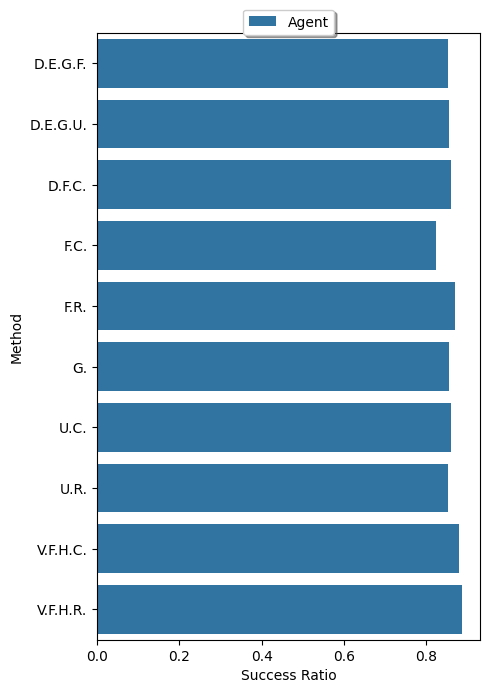

In [19]:


# method_group
sns.barplot(y="M", x="Success Ratio", hue="Loss Type", data=method_group.reset_index())
# change the fig ratio
plt.gcf().set_size_inches(5, 7.)

# rename Y axis
plt.ylabel('Method')
# move the legend to the top center
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True, shadow=True)
# 

# save the whole figure dont cut the legend
plt.tight_layout()


plt.savefig(f"{root_directory}/../data_analysis/plots/Success_Ratio.png", dpi=300)

In [20]:
# g = sns.catplot(x="Experiment Id", y="count", hue="Success", kind="bar", col="Loss Type", data=df_end.groupby(['Method','Success', 'Loss Type']).count()['Experiment Id'].reset_index())

# # Set labels for axes and title
# g.set_axis_labels("Experiment Id", "Count")
# g.set_titles("{col_name} Loss Type")

In [21]:
# save only the success
df_end_success = df_end[df_end['Success'] == True]

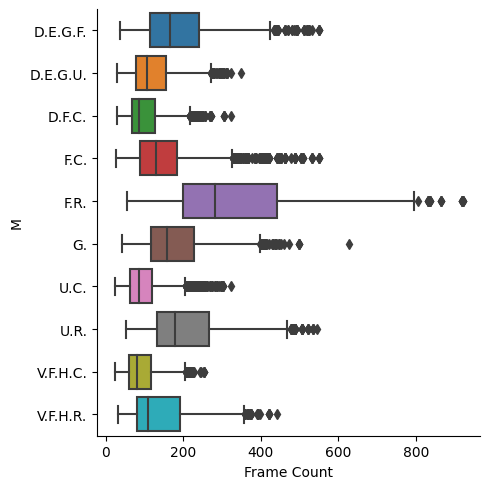

In [22]:
sns.catplot(y="M", x="Frame Count", kind="box", data=df_end_success)
plt.savefig(f"{root_directory}/../data_analysis/plots/boxplot_frame_count.png")

<AxesSubplot:xlabel='Frame Count', ylabel='M'>

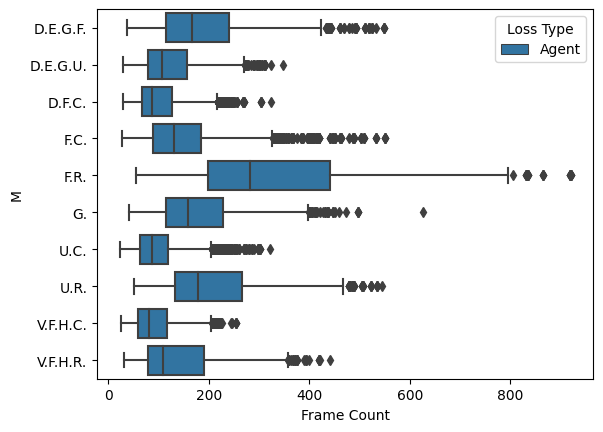

In [23]:
sns.boxplot(y="M", x="Frame Count",hue="Loss Type", data=df_end_success)


(0.0, 400.0)

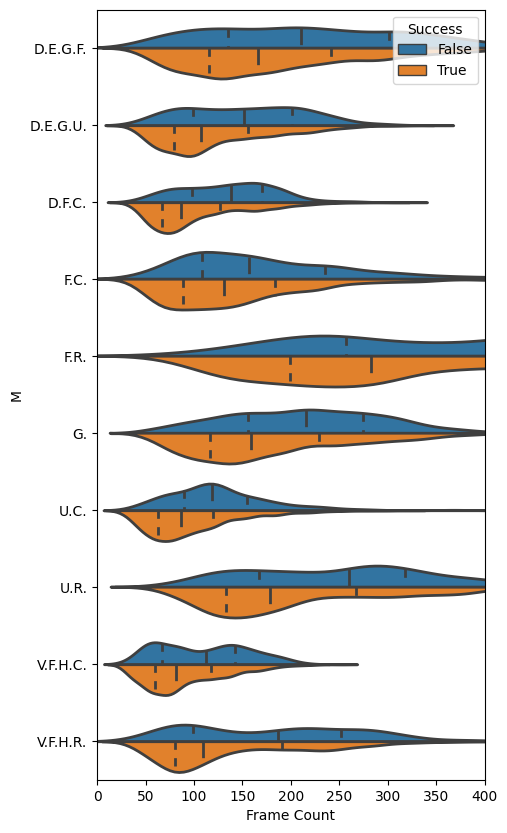

In [24]:
fig, ax = plt.subplots(figsize=(5, 10))
sns.violinplot(y="M", x="Frame Count",hue="Success",
                data=df_end ,
                linewidth=2, split=True, inner="quartile",)
ax.set_xlim(0, 400)


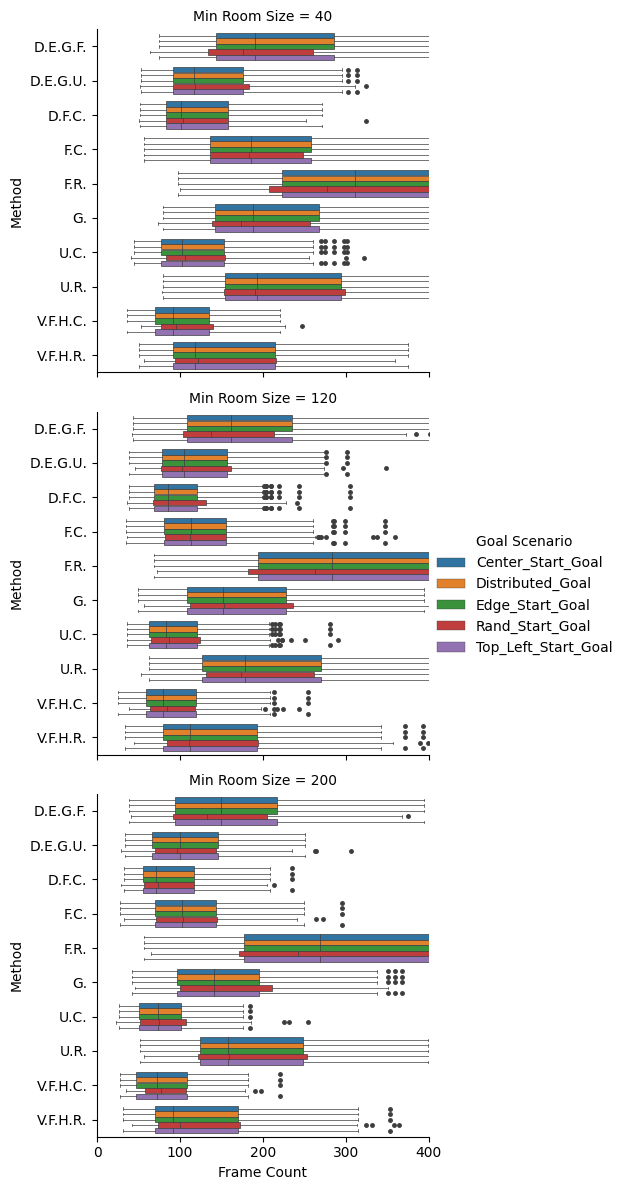

In [30]:
# grd = sns.catplot(
#     data=df_end_success, 
#     x="Frame Count", y="M", hue="Min Room Size",
#     col="Goal Scenario", col_wrap=1,
#     kind="box", 
#     # bw=.25, cut=0, 
#     flierprops={"marker": "."},

#     linewidth=0.5,
#     height=4, aspect=1.2, 
# )

grd = sns.catplot(
    data=df_end_success, 
    x="Frame Count", y="M", hue="Goal Scenario",
    col="Min Room Size", col_wrap=1,
    kind="box", 
    # bw=.25, cut=0, 
    flierprops={"marker": "."},

    linewidth=0.5,
    height=4, aspect=1.2, 
)

# set x range 
grd.set(xlim=(0, 400))
# set Y label
grd.set_ylabels("Method")

# mkae the fige bigger
# grd.fig.set_size_inches(15, 6)
plt.savefig(f"{root_directory}/../data_analysis/plots/boxplot_frame_count.png", dpi=300)


In [ ]:
# df_end.groupby(['Experiment Id']).mean().sort_values('Frame Count')

FileNotFoundError: [Errno 2] No such file or directory: '/home/direct-lab/Documents/christopher/Multi_Agents_Area_Exploration/analysing_data/../data_analysis/plots/runs/Replan Count_vs_Frame_Count.png'

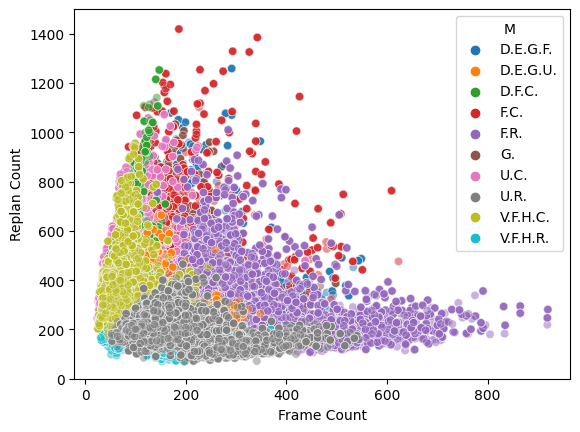

In [ ]:
sns.scatterplot(x="Frame Count",y='Replan Count', hue="M", data=df_end, alpha=.5,)
# sns.kdeplot(x="Frame Count",y='Replan Count', hue="M", 
#              data=df_end,
#              fill=True,
#              levels=10,
#              alpha=.5,
#              )

# plt.xlim(0, 400)
plt.ylim(0, 1500)

plt.savefig(f"{root_directory}/../data_analysis/plots/runs/{'Replan Count'}_vs_Frame_Count.png", dpi=300)

  0%|          | 0/5 [00:40<?, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: '/home/direct-lab/Documents/christopher/Multi_Agents_Area_Exploration/analysing_data/../data_analysis/plots/runs/Update Time_vs_Frame_Count.png'

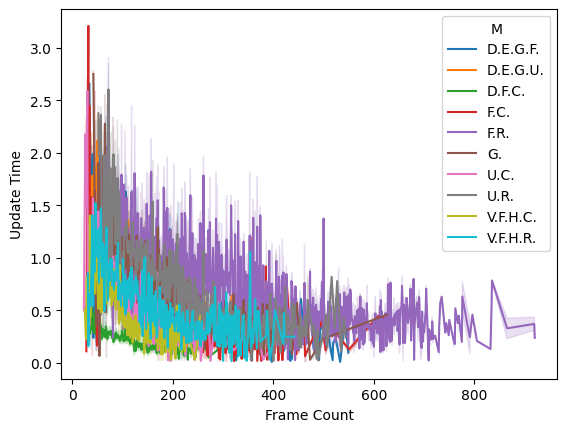

In [ ]:
import tqdm
ploty =['Update Time', 'Delta Time', 'Plan Length', 'Replan Count', 'Logging Time', ]
for y in tqdm.tqdm(ploty):
    sns.lineplot(x="Frame Count",y=y, hue="M", data=df_end)
    plt.savefig(f"{root_directory}/../data_analysis/plots/runs/{y}_vs_Frame_Count.png", dpi=300)
    plt.show()

In [ ]:
import tqdm
ploty =['Update Time', 'Delta Time', 'PlaUn Length', 'Replan Count', 'Logging Time', ]
for y in tqdm.tqdm(ploty):
    sns.scatterplot(x="Frame Count",y=y, hue="M", data=df_end)
    plt.savefig(f"{root_directory}/data_analysis/plots/runs/scatter{y}_vs_Frame_Count.png", dpi=300)
    plt.show()